## Phase portrait of genes undergoing variable-rate event

In [1]:
import warnings
warnings.filterwarnings("ignore")

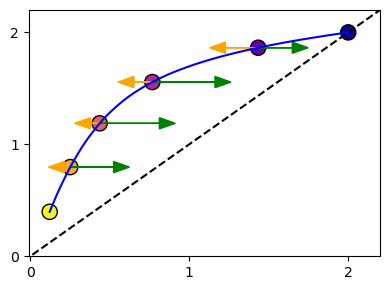

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
alpha_base = 1.0   # Initial transcription rate
beta = 0.5         # Splicing rate
gamma_0 = 0.5      # Baseline degradation rate
gamma_m = 0.5      # microRNA effect on degradation
k_m = 0.5          # microRNA activation rate
delta_m = 0.1      # microRNA degradation rate
signal_strength = 1.0  # Signal strength
signal_duration = 10   # Duration of the signal
k_feedback = 0.1   # Feedback of microRNA on transcription rate

# ODE system for gene and microRNA dynamics
def gene_micro_rna_dynamics_with_feedback(t, y):
    u, s, m = y
    # Signal activates microRNA expression
    signal = signal_strength if t < signal_duration else 0.0
    dm_dt = k_m * signal - delta_m * m  # microRNA dynamics
    gamma = gamma_0 + gamma_m * m  # Degradation rate affected by microRNA
    alpha = alpha_base - k_feedback * t  # Transcription rate with feedback
    du_dt = alpha - beta * u  # Immature RNA dynamics
    ds_dt = beta * u - gamma * s  # Mature RNA dynamics
    return [du_dt, ds_dt, dm_dt]

def stop_simulation(t, y):
    u, s, _ = y
    return min(u, s)

stop_simulation.terminal = True
stop_simulation.direction = -1  

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Initial conditions
u0 = alpha_base / beta     # Steady state of immature RNA
s0 = alpha_base / gamma_0  # Steady state of mature RNA
m0 = 0.0  # Initial microRNA quantity
y0 = [u0, s0, m0]

# Solve ODEs with event detection
solution = solve_ivp(
    gene_micro_rna_dynamics_with_feedback,
    t_span,
    y0,
    t_eval=t_eval,
    events=stop_simulation,
)

u = solution.y[0]
s = solution.y[1]
m = solution.y[2]
ds_dt = beta * u - (gamma_0 + gamma_m * m) * s 
# gamma_tilder = gamma_0 / beta
gamma_tilder = max(u) / max(s)
rna_velocity = u - gamma_tilder * s 

micro_rna_signal = m

indices = np.linspace(0, len(solution.t) - 1, 6, dtype=int)
s_vector = s[indices]
u_vector = u[indices]
micro_rna_signal_vector = micro_rna_signal[indices]
ds_vector = ds_dt[indices]
rna_velocity_vector = rna_velocity[indices]

plt.figure(figsize=(4, 3))

# Pseudo steady-state line
s_vals = np.linspace(-0.1, max(s) * 1.1, 100) 
u_vals = gamma_tilder * s_vals
line_pseudo, = plt.plot(s_vals, u_vals, 'k--', label=r"$u = \tilde{\gamma}s$ (pseudo steady state)")

line_trajectory, = plt.plot(s, u, 'b-', label="Trajectory with microRNA Signal")
sc = plt.scatter(s_vector, u_vector, c=solution.t[indices], cmap='plasma', edgecolor="black", s=120)

for i in range(1, len(indices) - 1):  
    plt.arrow(
        s_vector[i], u_vector[i], 
        0.5 * ds_vector[i], 0, 
        head_width=0.1, head_length=0.1, color="orange"
    )


for i in range(1, len(indices) - 1):
    plt.arrow(
        s_vector[i], u_vector[i], 
        0.5 * rna_velocity_vector[i], 0,
        head_width=0.1, head_length=0.1, color="green"
    )

plt.xlim(-0.01, max(s) * 1.1)
plt.ylim(0.0, max(u) * 1.1)
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.tight_layout()
# plt.savefig("fast_degrad_phase.pdf", dpi=300, transparent=True)
plt.show()

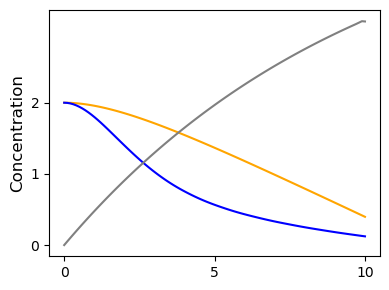

In [3]:
time = solution.t
# Plot u, s, and m over time
plt.figure(figsize=(4,3))
plt.plot(time, u, label="Unspliced RNA (u)", color="Orange")
plt.plot(time, s, label="Spliced RNA (s)", color="Blue")
plt.plot(time, m, label="microRNA (m)", color="gray")

# Formatting the plot
plt.ylabel("Concentration", fontsize=12,)
plt.xticks([0, 5, 10])
plt.yticks([0, 1, 2]) 
plt.tight_layout()
# plt.savefig("fast_degrad.pdf", dpi=300, transparent=True)
plt.show()

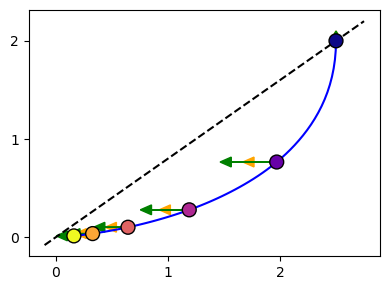

<Figure size 640x480 with 0 Axes>

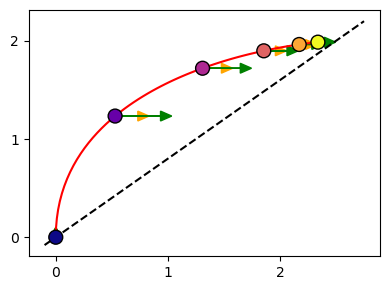

In [ ]:
# Parameters
alpha_base_1 = 0   # Initial transcription rate
alpha_base_2 = 1   # Initial transcription rate
beta = 0.5         # Splicing rate
gamma_0 = 0.4      # Baseline degradation rate
gamma_m = 0        # microRNA effect on degradation
k_m = 0.5          # microRNA activation rate
delta_m = 0.1      # microRNA degradation rate
signal_strength = 1.0  # Signal strength
signal_duration = 80  # Duration of the signal
k_feedback = 0       # Feedback of microRNA on transcription rate

# ODE system for gene and microRNA dynamics
def ss_rna_model(t, y, alpha_base):
    u, s = y  # Degradation rate affected by microRNA
    du_dt = alpha_base - beta * u  # Immature RNA dynamics
    ds_dt = beta * u - gamma_0 * s  # Mature RNA dynamics
    return [du_dt, ds_dt]

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Initial conditions for trajectory 1
u0_1 = alpha_base_2 / beta
s0_1 = alpha_base_2 / gamma_0
y0_1 = [u0_1, s0_1]

# Initial conditions for trajectory 2
u0_2 = 0.0
s0_2 = 0.0
y0_2 = [u0_2, s0_2]

# Solve ODEs for both trajectories
solution_1 = solve_ivp(
    ss_rna_model,
    t_span,
    y0_1,
    t_eval=t_eval,
    args=(alpha_base_1,)
)

solution_2 = solve_ivp(
    ss_rna_model,
    t_span,
    y0_2,
    t_eval=t_eval,
    args=(alpha_base_2,)
)

u_1 = solution_1.y[0]
s_1 = solution_1.y[1]

u_2 = solution_2.y[0]
s_2 = solution_2.y[1]

# Pseudo steady-state line
gamma_tilder = gamma_0 / beta
s_vals = np.linspace(-0.1, max(max(s_1), max(s_2)) * 1.1, 100)
u_vals = gamma_tilder * s_vals


plt.figure(figsize=(4, 3))

plt.plot(s_vals, u_vals, 'k--', label=r"$u = \tilde{\gamma}s$ (pseudo steady state)")

plt.plot(s_1, u_1, 'b-', label="Down-regulation trajectory ($\alpha$ = 0)")
indices = np.linspace(0, len(solution_1.t) - 1, 6, dtype=int)
plt.scatter(s_1[indices], u_1[indices], c=solution_1.t[indices], cmap='plasma', edgecolor="black", s=100, zorder=5)
for idx in indices:
    ground_truth_velocity_1 = beta * u_1[idx] - gamma_0 * s_1[idx]  # Ground truth RNA velocity
    approximated_velocity_1 = u_1[idx] - gamma_tilder * s_1[idx]    # RNA velocity approximation
    plt.arrow(
        s_1[idx], u_1[idx],
        0.5 * ground_truth_velocity_1, 0,
        head_width=0.1, head_length=0.1, color="orange"
    )
    plt.arrow(
        s_1[idx], u_1[idx],
        0.5 * approximated_velocity_1, 0,
        head_width=0.1, head_length=0.1, color="green"
    )
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])

plt.tight_layout()
# plt.savefig("normal_depression_phase.pdf", dpi=300, transparent=True)
plt.show()

plt.clf()


plt.figure(figsize=(4, 3))
plt.plot(s_vals, u_vals, 'k--', label=r"$u = \tilde{\gamma}s$ (pseudo steady state)")

# Plot trajectory 2
plt.plot(s_2, u_2, 'r-', label="Up-regulation trajectory ($\alpha$ = 1)")

indices = np.linspace(0, len(solution_2.t) - 1, 6, dtype=int)
plt.scatter(s_2[indices], u_2[indices], c=solution_2.t[indices], cmap='plasma', edgecolor="black", s=100, zorder=5)
for idx in indices:
    ground_truth_velocity_2 = beta * u_2[idx] - gamma_0 * s_2[idx]  # Ground truth RNA velocity
    approximated_velocity_2 = u_2[idx] - gamma_tilder * s_2[idx]  # RNA velocity approximation
    plt.arrow(
        s_2[idx], u_2[idx],
        0.5 * ground_truth_velocity_2, 0,
        head_width=0.1, head_length=0.1, color="orange"
    )
    plt.arrow(
        s_2[idx], u_2[idx],
        0.5 * approximated_velocity_2, 0,
        head_width=0.1, head_length=0.1, color="green"
    )

plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])

plt.tight_layout()
# plt.savefig("normal_induction_phase.pdf", dpi=300, transparent=True)
plt.show()


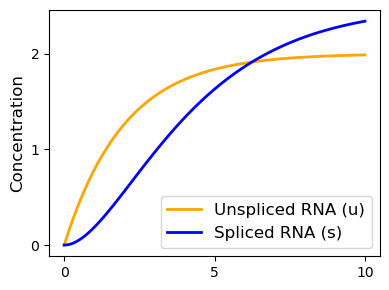

In [ ]:
time = solution_2.t
plt.figure(figsize=(4, 3))
plt.plot(time, u_2, label="Unspliced RNA (u)", color="orange", linewidth=2)
plt.plot(time, s_2, label="Spliced RNA (s)", color="blue", linewidth=2)

plt.ylabel("Concentration", fontsize=12)
plt.legend(fontsize=12)
plt.xticks([0, 5, 10])
plt.yticks([0, 1, 2])
plt.tight_layout()
# plt.savefig("normal_induction.pdf", dpi=300, transparent=True)
plt.show()

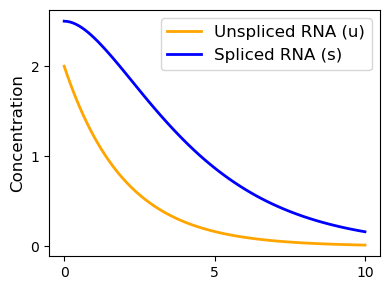

In [ ]:
time = solution_1.t
plt.figure(figsize=(4, 3))
plt.plot(time, u_1, label="Unspliced RNA (u)", color="orange", linewidth=2)
plt.plot(time, s_1, label="Spliced RNA (s)", color="blue", linewidth=2)

plt.ylabel("Concentration", fontsize=12)
plt.legend(fontsize=12)
plt.xticks([0, 5, 10])
plt.yticks([0, 1, 2])
plt.tight_layout()
# plt.savefig("normal_repression.pdf", dpi=300, transparent=True)
plt.show()

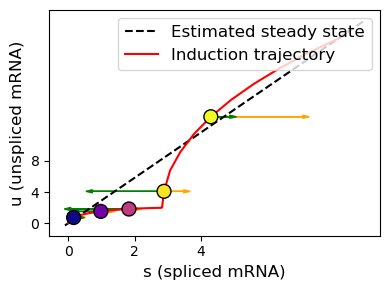

In [ ]:
# Parameters
alpha_base_1 = 0   # Initial transcription rate
alpha_base_2 = 1.0   # Initial transcription rate
beta = 0.5         # Splicing rate
gamma_0 = 0.3      # Baseline degradation rate
gamma_m = 0        # microRNA effect on degradation
k_m = 0.5          # microRNA activation rate
delta_m = 0.1      # microRNA degradation rate
signal_strength = 1.0  # Signal strength
signal_duration = 130  # Duration of the signal
k_feedback = 3.0       # Feedback of microRNA on transcription rate

# ODE system for gene and microRNA dynamics
def gene_micro_rna_dynamics(t, y, alpha_base):
    u, s, m = y
    # Signal activates microRNA expression
    signal = signal_strength if t < signal_duration else 0.0
    dm_dt = k_m * signal - delta_m * m  # microRNA dynamics
    gamma = gamma_0  # Degradation rate affected by microRNA
    alpha = alpha_base if t<9 else k_feedback * t # Transcription rate with feedback
    du_dt = alpha - beta * u  # Immature RNA dynamics
    ds_dt = beta * u - gamma * s  # Mature RNA dynamics
    return [du_dt, ds_dt, dm_dt]

t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

u0_2 = 0.0
s0_2 = 0.0
m0_2 = 0.0
y0_2 = [u0_2, s0_2, m0_2]

solution_2 = solve_ivp(
    gene_micro_rna_dynamics,
    t_span,
    y0_2,
    t_eval=t_eval,
    args=(alpha_base_2,)
)

u_2 = solution_2.y[0]
s_2 = solution_2.y[1]
m_2 = solution_2.y[2]

# Pseudo steady-state line
ss = max(u_2) / max(s_2)
s_vals = np.linspace(-0.1, max(s_2) * 1.1, 100)
u_vals = ss * s_vals

indices = [9, 28, 48, 90, 94]

plt.figure(figsize=(4,3))
plt.plot(s_vals, u_vals, 'k--', label=r"Estimated steady state")
plt.plot(s_2, u_2, 'r-', label="Induction trajectory")
plt.scatter(s_2[indices], u_2[indices], c=solution_2.t[indices], cmap='plasma', edgecolor="black", s=100, zorder=5)
for idx in indices:
    approximated_velocity_1 = u_2[idx] - ss * s_2[idx]
    plt.arrow(
        s_2[idx], u_2[idx],
        0.5 * (beta * u_2[idx] - gamma_0 * s_2[idx]), 0,
        head_width=0.4, head_length=0.2, color="orange"
    )
    plt.arrow(
        s_2[idx], u_2[idx],
        0.5 * approximated_velocity_1, 0,
        head_width=0.4, head_length=0.2, color="green"
    )

plt.legend(fontsize=12, loc="upper right")

plt.xlabel("s (spliced mRNA)", fontsize=12,)
plt.ylabel("u (unspliced mRNA)", fontsize=12,)
plt.xticks([0, 2, 4])
plt.yticks([0, 4, 8])

plt.tight_layout()
# plt.savefig("burst.pdf", dpi=300, transparent=True)
plt.show()


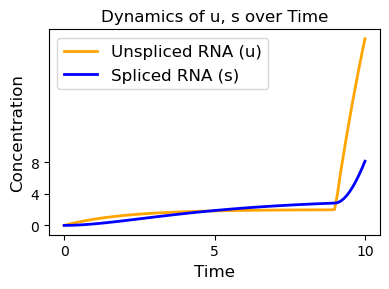

In [ ]:
time = solution_2.t
plt.figure(figsize=(4, 3))
plt.plot(time, u_2, label="Unspliced RNA (u)", color="orange", linewidth=2)
plt.plot(time, s_2, label="Spliced RNA (s)", color="blue", linewidth=2)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.title("Dynamics of u, s over Time", fontsize=12)
plt.legend(fontsize=12)
plt.xticks([0, 5, 10])
plt.yticks([0, 4, 8])
plt.tight_layout()
# plt.savefig("burst_induction.pdf", dpi=300, transparent=True)
plt.show()